# **CSCI 183 - HW 3**
## Tara Khambadkone & Ansha Shekhar



In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')
%cd /content/drive/Shareddrives/CSCI183_Homeworks/HW3
heart_df = pd.read_csv("heart.csv")
heart_df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/Shareddrives/CSCI183_Homeworks/HW3


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Step 1: 2D plots to visualize linear separability of data

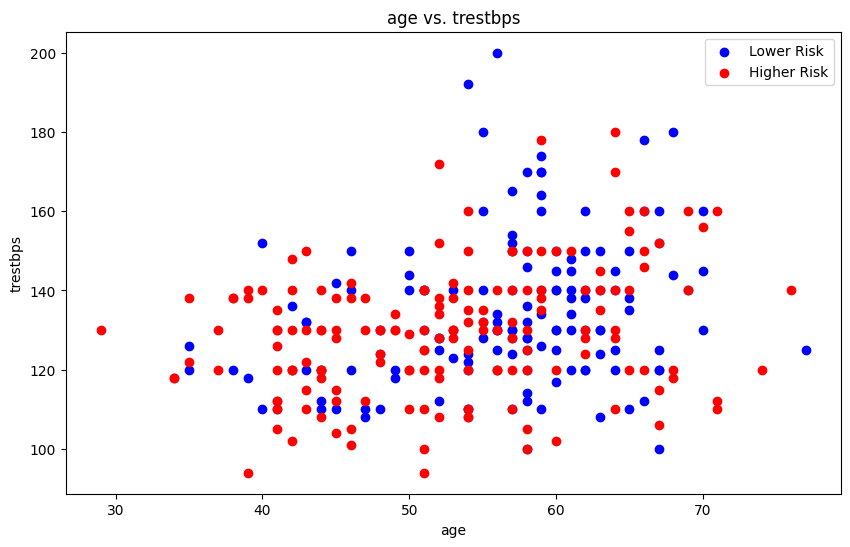

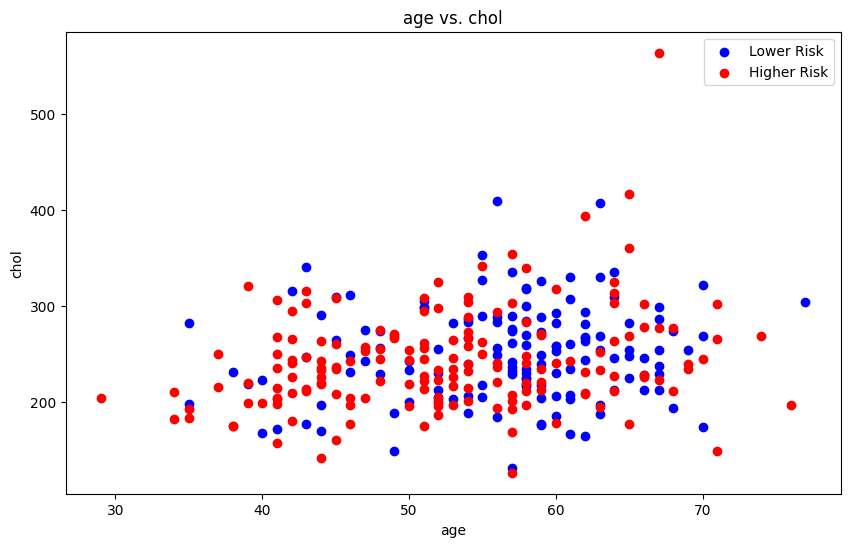

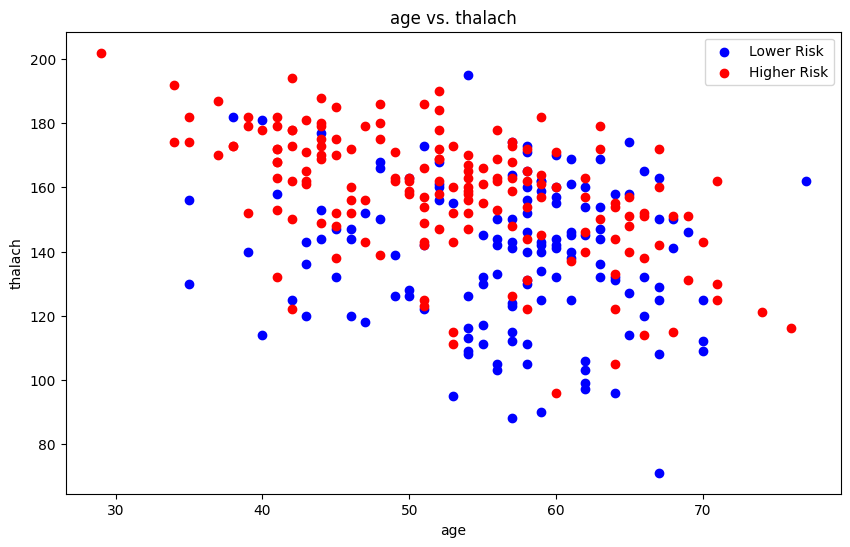

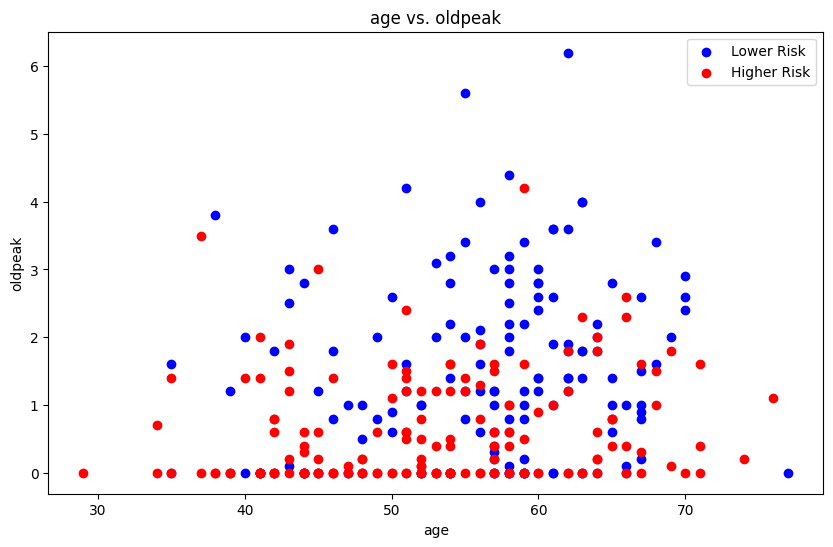

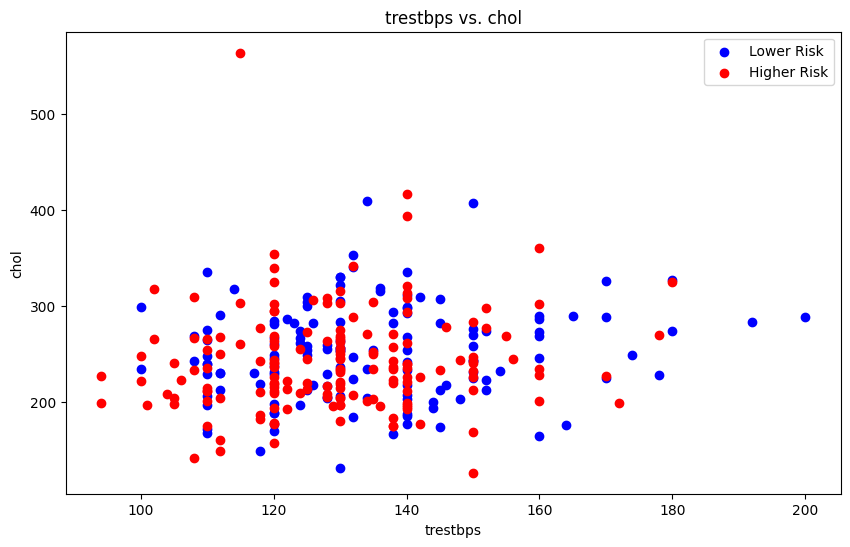

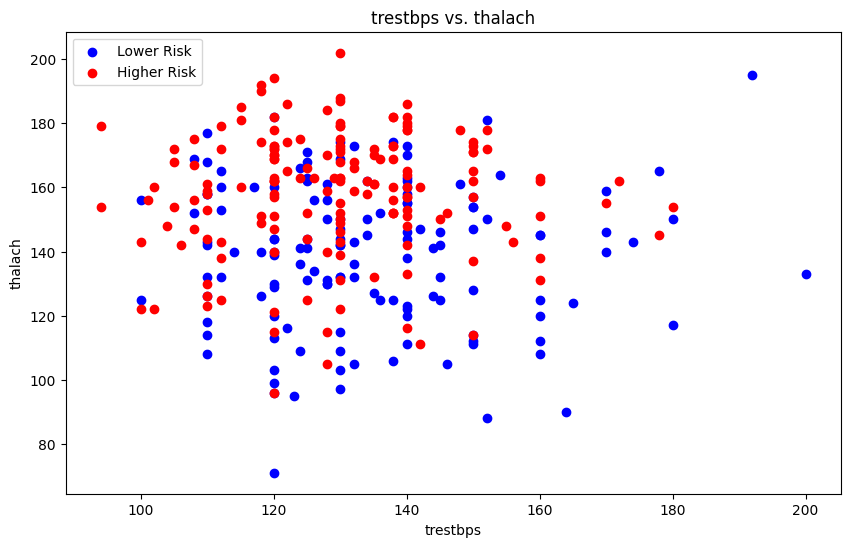

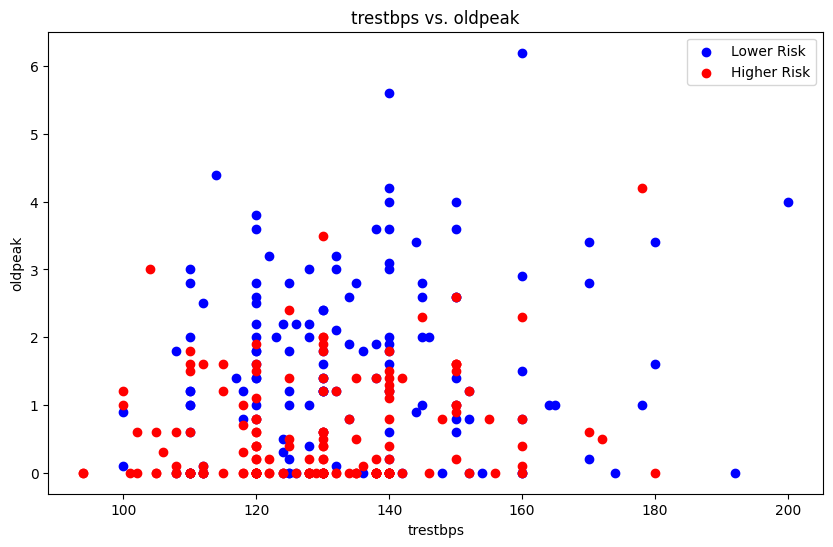

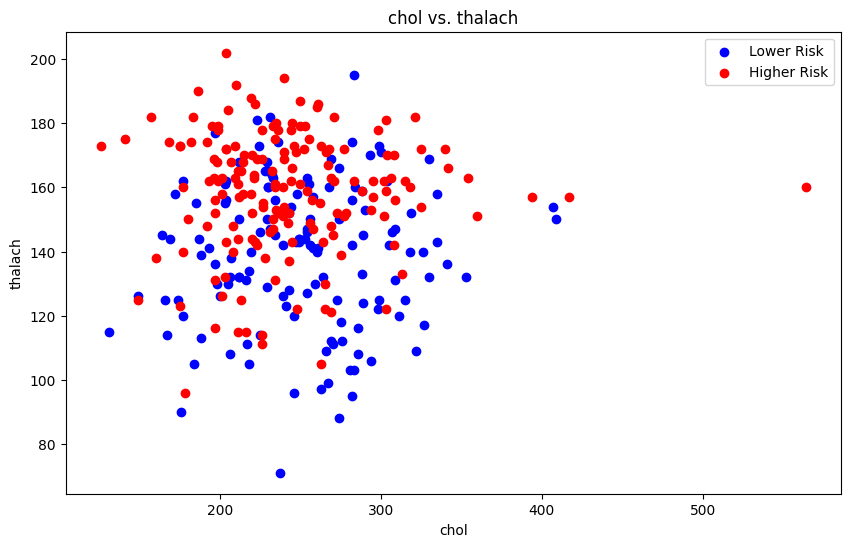

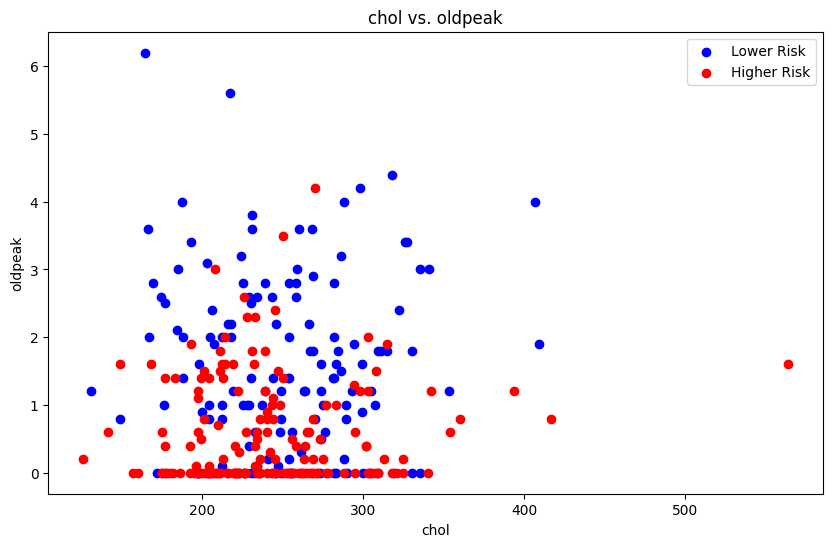

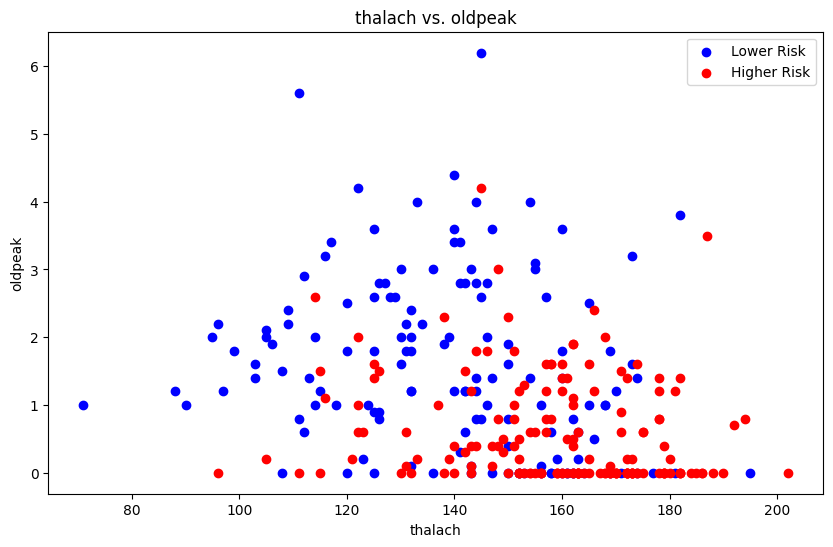

In [ ]:
import matplotlib.pyplot as plt

plot_pairs = [('age', 'trestbps'), ('age', 'chol'), ('age', 'thalach'), ('age', 'oldpeak'),
              ('trestbps', 'chol'), ('trestbps', 'thalach'), ('trestbps', 'oldpeak'),
              ('chol', 'thalach'), ('chol', 'oldpeak'),
              ('thalach', 'oldpeak')]

heart_df_0 = heart_df[heart_df['target'] == 0]
heart_df_1 = heart_df[heart_df['target'] == 1]

for f1, f2 in plot_pairs:
  plt.figure(figsize=(10,6))
  plt.scatter(heart_df_0[f1], heart_df_0[f2], label='Lower Risk', color='blue')
  plt.scatter(heart_df_1[f1], heart_df_1[f2], label='Higher Risk', color='red')
  plt.title(f1 + ' vs. ' + f2)
  plt.xlabel(f1)
  plt.ylabel(f2)
  plt.legend()
  plt.show()


### Step 2: Logistic Regression & LinearSVC on 4 pairs of almost linearly separable features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

selected_pairs = [('age', 'thalach'), ('age', 'oldpeak'), ('chol', 'thalach'), ('thalach', 'oldpeak')]

# Function for training and evaluating model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return [precision, recall, accuracy, f1]

for f1, f2 in selected_pairs:
  X = heart_df[[f1, f2]]
  y = heart_df['target']

  # Training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

  # Normalization
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Models
  logReg_model = LogisticRegression(random_state=0)
  linearSVC_model = LinearSVC(random_state=0, max_iter=40)

  #Train and evaluate
  logReg_results = train_and_evaluate(logReg_model, X_train_scaled, X_test_scaled, y_train, y_test)
  linearSVC_results = train_and_evaluate(linearSVC_model, X_train_scaled, X_test_scaled, y_train, y_test)

  # Display the results
  results = pd.DataFrame({
      "Algorithm": ["Logistic Regression", "Linear SVC"],
      "Precision": [logReg_results[0], linearSVC_results[0]],
      "Recall": [logReg_results[1], linearSVC_results[1]],
      "Accuracy": [logReg_results[2], linearSVC_results[2]],
      "F1-Score": [logReg_results[3], linearSVC_results[3]]
  })

  print("Evalutation of Logistic Regression & LinearSVC on " + f1 + " & " + f2 + '\n')
  print(results)
  print('\n')



Evalutation of Logistic Regression & LinearSVC on age & thalach

             Algorithm  Precision    Recall  Accuracy  F1-Score
0  Logistic Regression   0.650000  0.829787  0.681319  0.728972
1           Linear SVC   0.666667  0.851064  0.703297  0.747664


Evalutation of Logistic Regression & LinearSVC on age & oldpeak

             Algorithm  Precision    Recall  Accuracy  F1-Score
0  Logistic Regression   0.600000  0.829787  0.626374  0.696429
1           Linear SVC   0.606061  0.851064  0.637363  0.707965


Evalutation of Logistic Regression & LinearSVC on chol & thalach

             Algorithm  Precision   Recall  Accuracy  F1-Score
0  Logistic Regression   0.683333  0.87234  0.725275  0.766355
1           Linear SVC   0.683333  0.87234  0.725275  0.766355


Evalutation of Logistic Regression & LinearSVC on thalach & oldpeak

             Algorithm  Precision    Recall  Accuracy  F1-Score
0  Logistic Regression   0.701754  0.851064  0.736264  0.769231
1           Linear SVC   0.7

### Step 3: Build a model on ALL numerical features

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Load the dataset
data = pd.read_csv('heart.csv')
X = data.drop(columns='target')
y = data['target']

# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
logistic_model = LogisticRegression(random_state=0)
linear_svc_model = LinearSVC(random_state=0, max_iter=10000)
kernel_svm_model = SVC(kernel='rbf', random_state=0)

# Train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, accuracy, f1

logistic_results = train_and_evaluate(logistic_model, X_train_scaled, X_test_scaled, y_train, y_test)
linear_svc_results = train_and_evaluate(linear_svc_model, X_train_scaled, X_test_scaled, y_train, y_test)
kernel_svm_results = train_and_evaluate(kernel_svm_model, X_train_scaled, X_test_scaled, y_train, y_test)

# Display the results
results = pd.DataFrame({
    "Algorithm": ["Logistic Regression", "Linear SVC", "Kernel SVM"],
    "Precision": [logistic_results[0], linear_svc_results[0], kernel_svm_results[0]],
    "Recall": [logistic_results[1], linear_svc_results[1], kernel_svm_results[1]],
    "Accuracy": [logistic_results[2], linear_svc_results[2], kernel_svm_results[2]],
    "F1-Score": [logistic_results[3], linear_svc_results[3], kernel_svm_results[3]]
})

print(results)


             Algorithm  Precision    Recall  Accuracy  F1-Score
0  Logistic Regression   0.789474  0.865385      0.81  0.825688
1           Linear SVC   0.789474  0.865385      0.81  0.825688
2           Kernel SVM   0.783333  0.903846      0.82  0.839286
